# Задача: Анализ текста о науке о данных

В этом примере мы выполним простое упражнение, охватывающее все этапы традиционного процесса работы с данными. Вам не нужно писать код, достаточно просто нажимать на ячейки ниже, чтобы выполнить их и наблюдать за результатом. В качестве задания вам предлагается попробовать этот код с другими данными.

## Цель

На этом уроке мы обсуждали различные концепции, связанные с наукой о данных. Давайте попробуем обнаружить больше связанных концепций, выполнив **текстовый анализ**. Мы начнем с текста о науке о данных, извлечем из него ключевые слова, а затем попробуем визуализировать результат.

В качестве текста я использую страницу о науке о данных из Википедии:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Шаг 1: Получение данных

Первый шаг в любом процессе работы с данными — это получение данных. Для этого мы будем использовать библиотеку `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Шаг 2: Преобразование данных

Следующий шаг — преобразовать данные в форму, подходящую для обработки. В нашем случае мы скачали исходный HTML-код страницы, и нам нужно преобразовать его в обычный текст.

Существует множество способов сделать это. Мы будем использовать самый простой встроенный объект [HTMLParser](https://docs.python.org/3/library/html.parser.html) из Python. Нам нужно создать подкласс класса `HTMLParser` и определить код, который будет собирать весь текст внутри HTML-тегов, за исключением тегов `<script>` и `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Шаг 3: Получение инсайтов

Самый важный шаг — это преобразование данных в такую форму, из которой можно извлечь полезные выводы. В нашем случае мы хотим выделить ключевые слова из текста и определить, какие из них наиболее значимы.

Мы будем использовать библиотеку Python под названием [RAKE](https://github.com/aneesha/RAKE) для извлечения ключевых слов. Сначала установим эту библиотеку, если она еще не установлена:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Основная функциональность доступна через объект `Rake`, который мы можем настроить с помощью некоторых параметров. В нашем случае мы установим минимальную длину ключевого слова в 5 символов, минимальную частоту ключевого слова в документе - 3, а максимальное количество слов в ключевом слове - 2. Не стесняйтесь экспериментировать с другими значениями и наблюдать за результатом.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Мы получили список терминов вместе с соответствующей степенью важности. Как вы можете видеть, наиболее значимые дисциплины, такие как машинное обучение и большие данные, находятся в верхних позициях списка.

## Шаг 4: Визуализация результата

Люди лучше всего воспринимают данные в визуальной форме. Поэтому часто имеет смысл визуализировать данные, чтобы извлечь некоторые инсайты. Мы можем использовать библиотеку `matplotlib` в Python, чтобы построить простое распределение ключевых слов с их значимостью:


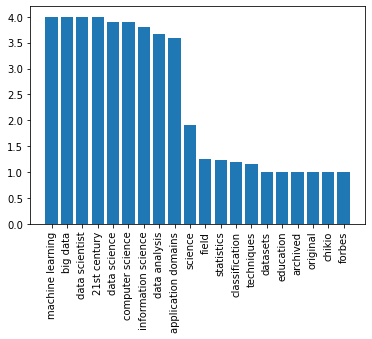

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Однако существует еще более лучший способ визуализировать частоту слов - с помощью **облака слов**. Нам потребуется установить еще одну библиотеку, чтобы построить облако слов из нашего списка ключевых слов.


In [71]:
!{sys.executable} -m pip install wordcloud

Объект `WordCloud` отвечает за обработку либо исходного текста, либо предварительно вычисленного списка слов с их частотами, и возвращает изображение, которое затем можно отобразить с помощью `matplotlib`:


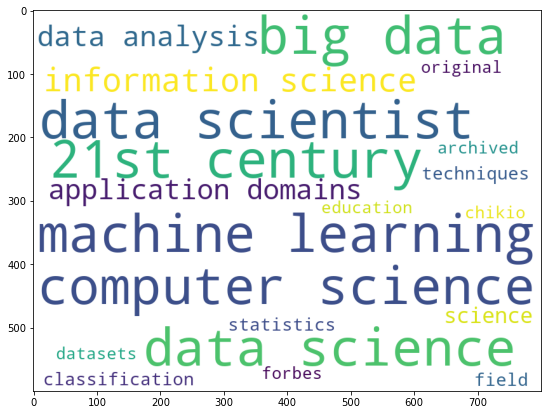

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Мы также можем передать оригинальный текст в `WordCloud` - давайте посмотрим, сможем ли мы получить похожий результат:


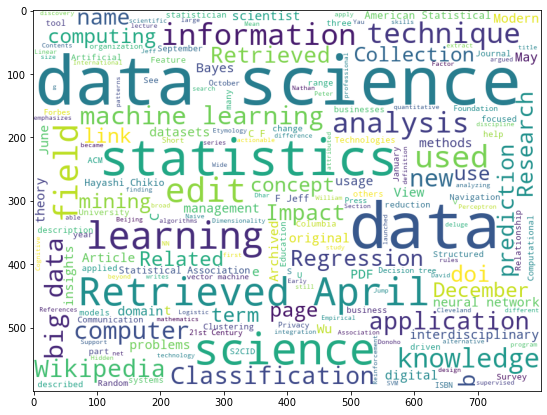

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Вы можете заметить, что облако слов теперь выглядит более впечатляющим, но оно также содержит много шума (например, несвязанные слова, такие как `Retrieved on`). Кроме того, мы получаем меньше ключевых слов, состоящих из двух слов, таких как *data scientist* или *computer science*. Это связано с тем, что алгоритм RAKE гораздо лучше справляется с выбором качественных ключевых слов из текста. Этот пример иллюстрирует важность предварительной обработки и очистки данных, поскольку четкая картина в конце позволит нам принимать более обоснованные решения.

В этом упражнении мы прошли простой процесс извлечения некоторого смысла из текста Википедии в форме ключевых слов и облака слов. Этот пример довольно прост, но он хорошо демонстрирует все типичные шаги, которые выполняет специалист по данным при работе с данными, начиная с получения данных и заканчивая визуализацией.

В нашем курсе мы подробно обсудим все эти шаги.



---

**Отказ от ответственности**:  
Этот документ был переведен с использованием сервиса автоматического перевода [Co-op Translator](https://github.com/Azure/co-op-translator). Несмотря на наши усилия обеспечить точность, автоматические переводы могут содержать ошибки или неточности. Оригинальный документ на его исходном языке следует считать авторитетным источником. Для получения критически важной информации рекомендуется профессиональный перевод человеком. Мы не несем ответственности за любые недоразумения или неправильные толкования, возникшие в результате использования данного перевода.
